## Introduce Scikit-Learn's Digit Dataset

In [1]:
from sklearn.datasets import load_digits

In [2]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [3]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

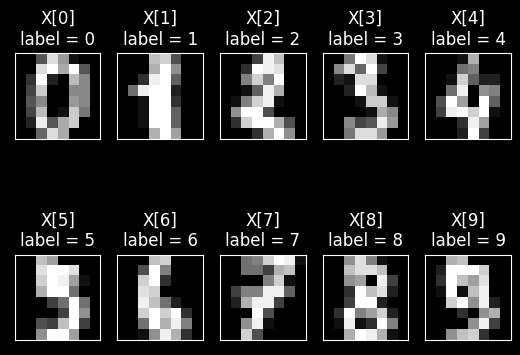

In [4]:
fig, ax = plt.subplots(2, 5, sharex=True, sharey=True)
for i in range(2):
    for j in range(5):
        index = 5*i+j
        ax[i,j].imshow(X[index].reshape((8,8)), cmap="gray")
        ax[i,j].set_title(f"X[{index}]\nlabel = {y[index]}")
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

We don't need `X`. Instead, by using `y` and `np.random`, we'd like to create
a bunch of independent weak learners, which together form a strong learner.

In [5]:
import numpy as np

In [6]:
rng = np.random.default_rng(42)

In [7]:
y_wrong = (y-1) % 10
print(f"{y       = }")
print(f"{y_wrong = }")

y       = array([0, 1, 2, ..., 8, 9, 8])
y_wrong = array([9, 0, 1, ..., 7, 8, 7])


## Build Weak Learners

Requirements
- should accuracy only be slightly better than `1/2`
    - or should accuracy only be slightly better than random guess, i.e. `1/10`?

In [8]:
class Weak:
    def __init__(self, p=0.51):
        self.p = p

    def predict(self, X):
        # TODO
        # 1. Use an rng instead
        # 2. Include X as arg and make it deterministic
        n_True = int(self.p * len(y))
        n_False = len(y) - n_True
        conditions = [True] * n_True + [False] * n_False
        np.random.shuffle(conditions)
        y_pred = np.where(conditions, y, y_wrong)
        return y_pred

In [9]:
weak = Weak()

In [10]:
y_pred = weak.predict(X)

## Test Our `Weak` Class

1. Do they all give different predictions?
1. Are their accuracies all equal to `p`?

In [11]:
np.array_equal(Weak().predict(X), Weak().predict(X))

False

In [12]:
print(f"{Weak().predict(X)[:10]}")
print(f"{Weak().predict(X)[:10]}")
print(f"{Weak().predict(X)[:10]}")

[0 0 2 3 4 5 6 7 7 8]
[9 1 1 3 3 5 5 6 8 8]
[0 1 2 2 3 5 6 6 7 9]


In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y, y_pred)

0.5097384529771842

In [15]:
k = 10
weaks = [Weak() for _ in range(k)]
accuracies= [accuracy_score(y, weak.predict(X)) for weak in weaks]
accuracies

[0.5097384529771842,
 0.5097384529771842,
 0.5097384529771842,
 0.5097384529771842,
 0.5097384529771842,
 0.5097384529771842,
 0.5097384529771842,
 0.5097384529771842,
 0.5097384529771842,
 0.5097384529771842]

## Reminder on `Counter`

In [16]:
from collections import Counter

In [19]:
np.random.seed(10)
digits = np.random.randint(low=0, high=10, size=15)
digits

array([9, 4, 0, 1, 9, 0, 1, 8, 9, 0, 8, 6, 4, 3, 0])

In [20]:
c = Counter(digits)
print(f"{c.most_common(3) = }")
print(f"{c.most_common(1) = }")

c.most_common(3) = [(0, 4), (9, 3), (4, 2)]
c.most_common(1) = [(0, 4)]


## Hard Voting

In [21]:
from collections import Counter
from tqdm.auto import tqdm

In [22]:
def hard_vote(many_y_pred):
    final_pred = []
    m = len(many_y_pred[0])
    for i in tqdm(range(m)):
        ith_preds = [y_pred[i] for y_pred in many_y_pred]
        counter = Counter(ith_preds)
        final_pred.append(counter.most_common(1)[0][0])
    return final_pred

In [23]:
k = 10_000
weaks = [Weak(0.51) for _ in range(k)]
many_y_pred = [weak.predict(X) for weak in weaks]

In [24]:
y_vote = hard_vote(many_y_pred)
accuracy_score(y, y_vote)

  0%|          | 0/1797 [00:00<?, ?it/s]

0.9788536449638287

In [25]:
k = 10_000
weaks = [Weak(0.2) for _ in range(k)]
many_y_pred = [weak.predict(X) for weak in weaks]

In [26]:
y_vote = hard_vote(many_y_pred)
accuracy_score(y, y_vote)

  0%|          | 0/1797 [00:00<?, ?it/s]

0.0